In [2]:
import pandas as pd

In [1]:
!pip install 

ModuleNotFoundError: No module named 'hfpy'

In [5]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense

RuntimeError: module compiled against API version 0x10 but this version of numpy is 0xf

SystemError: initialization of _pywrap_checkpoint_reader raised unreported exception

In [7]:
#Reading in the signal data into Dataframe
signals_df = pd.read_csv("Signals.csv")
signals_df.head(2)

,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11,Signal_Strength
0,7.4,0.70,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5


In [8]:
# Calculate the total number of rows
total_rows = len(signals_df)

# Iterate over each column
for column in signals_df.columns:
    # Count the number of missing values in the column
    missing_values = signals_df[column].isnull().sum()
    
    # Calculate the percentage of missing values
    percentage_missing = (missing_values / total_rows) * 100
    
    # Print the results
    print(f"Column '{column}': {percentage_missing:.2f}% missing values")

Column 'Parameter 1': 0.00% missing values
Column 'Parameter 2': 0.00% missing values
Column 'Parameter 3': 0.00% missing values
Column 'Parameter 4': 0.00% missing values
Column 'Parameter 5': 0.00% missing values
Column 'Parameter 6': 0.00% missing values
Column 'Parameter 7': 0.00% missing values
Column 'Parameter 8': 0.00% missing values
Column 'Parameter 9': 0.00% missing values
Column 'Parameter 10': 0.00% missing values
Column 'Parameter 11': 0.00% missing values
Column 'Signal_Strength': 0.00% missing values


In [12]:
# Check for duplicate records
duplicate_rows = signals_df.duplicated()

# Count the number of duplicate records
num_duplicates = duplicate_rows.sum()
if num_duplicates > 0:
    print(f"Found {num_duplicates} duplicate record(s).")
    
    # Drop duplicate records
    signals_df.drop_duplicates(inplace=True)
    
    print("Duplicate records have been dropped.")
else:
    print("No duplicate records found.")

No duplicate records found.


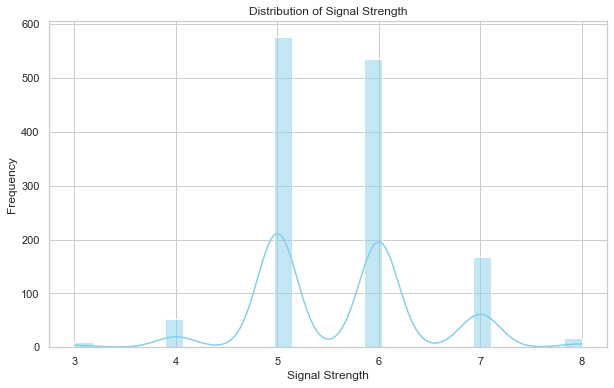

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style of seaborn
sns.set(style="whitegrid")

# Plot the distribution of Signal_Strength
plt.figure(figsize=(10, 6))
sns.histplot(signals_df['Signal_Strength'], kde=True, color='skyblue')
plt.title('Distribution of Signal Strength')
plt.xlabel('Signal Strength')
plt.ylabel('Frequency')
plt.show()

> Observations from Initial Data Analysis:
>
> - 240 rows with duplicate data were found in the Signals.csv dataset
> - 6 discreet values of Signal Strength are present in the data, out of which Signal Strength "5" is the most frequent followed by "6"

In [18]:
from sklearn.model_selection import train_test_split

# Assuming 'X' contains the features and 'y' contains the target variable ('Signal_Strength')
X = signals_df.drop(columns=['Signal_Strength'])  # Features
y = signals_df['Signal_Strength']  # Target variable

# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Train set - X: (951, 11)  y: (951,)
Test set - X: (408, 11)  y: (408,)


In [19]:
# Print the shape of all variables
print("Shapes of variables after train-test split:")
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

# Verify if train and test data are in sync
if X_train.shape[0] == y_train.shape[0] and X_test.shape[0] == y_test.shape[0]:
    print("Train and test data are in sync.")
else:
    print("Train and test data are not in sync.")

Shapes of variables after train-test split:
X_train shape: (951, 11)
y_train shape: (951,)
X_test shape: (408, 11)
y_test shape: (408,)
Train and test data are in sync.


To normalize the training and testing data, you can use various scaling techniques such as Min-Max scaling or Standardization. Here, I'll demonstrate how to use Standardization using scikit-learn's StandardScaler.

In [20]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform it
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data using the same scaler
X_test_scaled = scaler.transform(X_test)

To prepare labels (target variable) for neural network training, you typically need to encode them in a format suitable for multi-class classification tasks. One common approach is one-hot encoding.

In [21]:
from sklearn.preprocessing import LabelBinarizer

# Initialize the LabelBinarizer
label_binarizer = LabelBinarizer()

# Fit and transform the labels in the training set
y_train_encoded = label_binarizer.fit_transform(y_train)

# Transform the labels in the test set (using the same label binarizer)
y_test_encoded = label_binarizer.transform(y_test)